### 线性回归

$\hat{y} = f_{w,b}(x^i)$  
$f_{w,b}(x^i) = wx^{(i)} + b$

### 平方成本函数
目标 minimize $J_{w,b}$

$ J_{(w,b)} = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)}-y^{(i)})^2 $ 

### 梯度下降算法

temp_w = w - $\alpha \frac{\partial}{\partial w} J_{(w, b)}  = w - \frac{\alpha}{m}\sum_{i=1}^m{(wx^{(i)}+b-y^i)x^{(i)}} $

temp_b = b - $\alpha \frac{\partial}{\partial b} J_{(w, b)} = w - \frac{\alpha}{m}\sum_{i=1}^m{wx^{(i)}+b-y^{(i)}} $

### python实现

In [3]:
import matplotlib.pyplot as plt
import copy
import math

In [4]:
# 成本函数
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
 
    return total_cost

In [5]:
# 梯度函数
def compute_gradient(x, y, w, b):      
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb_i = w * x[i] + b

        dj_db_i = f_wb_i - y[i]
        dj_dw_i = (f_wb_i - y[i]) * x[i]

        dj_db = dj_db + dj_db_i
        dj_dw = dj_dw + dj_dw_i

    dj_db = (1 / m) * dj_db
    dj_dw = (1 / m) * dj_dw

    return dj_dw, dj_db

In [6]:
# 梯度下降函数
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    函数用于求解最优回归模型参数w,b.  
    
    参数:
      x (ndarray (m,))  : 输入数据 
      y (ndarray (m,))  : 目标值
      w_in,b_in (scalar): 模型初始参数值  
      alpha (float):     学习率
      num_iters (int):   总迭代步数
      cost_function:     成本函数
      gradient_function: 梯度函数
      
    返回:
      w (scalar): 参数w计算结果
      b (scalar): 参数b计算结果
      J_history (List): 计算过程中的成本历史值
      p_history (list): 计算过程中的w,b历史值 
      """
    
    w = copy.deepcopy(w_in) # 深拷贝以避免修改全局w_in
    b = copy.deepcopy(b_in) # 深拷贝以避免修改全局w_in
    # 采用列表储存每一步迭代的成本值、w值、b值
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # 计算梯度并更新梯度值
        dj_dw, dj_db = gradient_function(x, y, w , b)     
 
        # 梯度下降更新参数值
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            
 
        # 每一步迭代中保存成本值
        if i<100000:      # 停止迭代的条件 
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # 每迭代10次打印一次成本
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

### 实例

In [7]:
import numpy as np

In [8]:
# 导入特征和目标值
x_train = np.array([1.00, 1.70, 2.00, 2.50, 3.00, 3.20])   #房子面积
y_train = np.array([2.50, 3.00, 4.80, 4.30, 6.30, 7.30])   #房子成交价

In [52]:
# 参数初始化
w_init = 0
b_init = 0
# 设置迭代步数和学习率
iterations = 100
tmp_alpha = 1.0e-2
# 执行梯度下降
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.09e+01  dj_dw: -1.170e+01, dj_db: -4.700e+00   w:  1.170e-01, b: 4.70000e-02
Iteration   10: Cost 3.02e+00  dj_dw: -6.004e+00, dj_db: -2.376e+00   w:  9.426e-01, b: 3.76456e-01
Iteration   20: Cost 9.37e-01  dj_dw: -3.087e+00, dj_db: -1.187e+00   w:  1.367e+00, b: 5.42135e-01
Iteration   30: Cost 3.92e-01  dj_dw: -1.593e+00, dj_db: -5.779e-01   w:  1.585e+00, b: 6.23981e-01
Iteration   40: Cost 2.49e-01  dj_dw: -8.275e-01, dj_db: -2.664e-01   w:  1.698e+00, b: 6.62927e-01
Iteration   50: Cost 2.11e-01  dj_dw: -4.356e-01, dj_db: -1.072e-01   w:  1.757e+00, b: 6.79932e-01
Iteration   60: Cost 2.01e-01  dj_dw: -2.349e-01, dj_db: -2.589e-02   w:  1.788e+00, b: 6.85730e-01
Iteration   70: Cost 1.98e-01  dj_dw: -1.320e-01, dj_db:  1.547e-02   w:  1.806e+00, b: 6.85814e-01
Iteration   80: Cost 1.97e-01  dj_dw: -7.920e-02, dj_db:  3.640e-02   w:  1.816e+00, b: 6.82999e-01
Iteration   90: Cost 1.96e-01  dj_dw: -5.207e-02, dj_db:  4.686e-02   w:  1.822e+00, b: 6.78723e-01


### 绘图

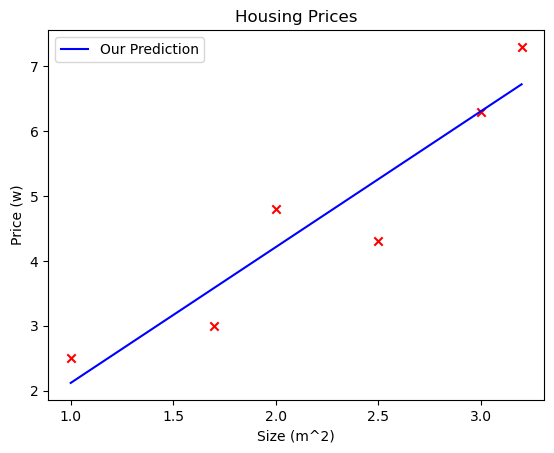

In [10]:
# 采用散点图绘出数据
plt.scatter(x_train, y_train, marker='x', c='r')

# 以折线形式绘出线行回归函数
plt.plot(x_train, w_final*x_train + b_final, c='b',label='Our Prediction')


# 设置标题
plt.title("Housing Prices")
# y-axis label
plt.ylabel('Price (w)')
# x-axis label
plt.xlabel('Size (m^2)')
plt.legend()
plt.show()

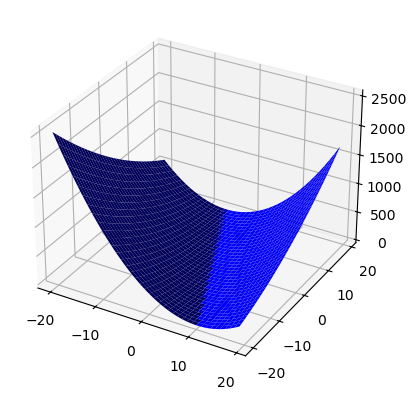

In [11]:
# 成本函数
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
w = np.arange(-20, 20)
b = np.arange(-20, 20)
w, b = np.meshgrid(w, b)
surf = ax.plot_surface(w, b, compute_cost(x_train, y_train, w, b), color='blue')

plt.show()

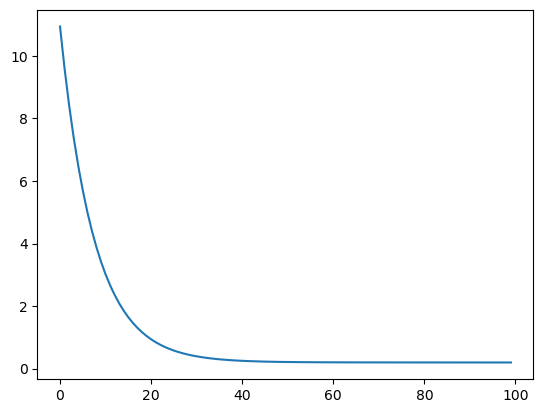

In [58]:
# 检查梯度下降是否收敛
plt.plot(J_hist)